In [18]:
from PIL import Image, ImageOps
import webdataset as wds
import pytesseract
from itertools import islice
import editdistance
import utils
from IPython.display import display, Image, Markdown
import openai
import os
from io import BytesIO
import base64
from pprint import pprint as pp
import json

# Set your API key here
api_key = openai.api_key = os.environ['OPENAI_API_KEY']

In [32]:
import base64
import requests

def encode_image(pil_image):
    """Encode a PIL Image to Base64."""
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

def gpt_recognize_text(image):
    base64_image = encode_image(image)

    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": "gpt-4-turbo",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": "Recognize the text in this image and return only the text as a string."
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    data = json.loads(response.text)
    try:
        result = data['choices'][0]['message']['content']
        return result
    except KeyError:
        return ""

gpt_recognize_text(image)

'including path planning, obstacle avoidance, and'

---

4 1 69


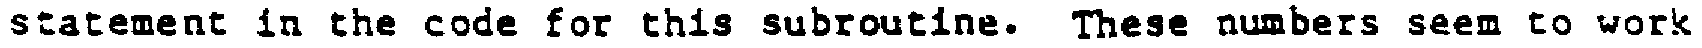

statement in the code for this subroutine. These numbers seem to work

statement in the code for this subroutine. These numbers seem to work.

---

16 61 61


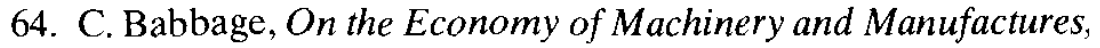

64. C. Babbage, On the Economy of Machinery and Manufactures,

---

19 47 64


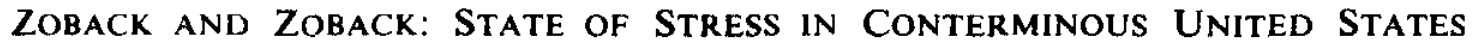

ZOBACK AND ZOBACK: STATE OF STRESS IN CONTERMINOUS UNITED STATES

Zoback and Zoback: State of Stress in Conterminous United States

---

37 1 33


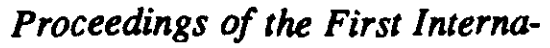

Proceedings of the First Interna-

Proceedings of the First Interna

---

40 3 77


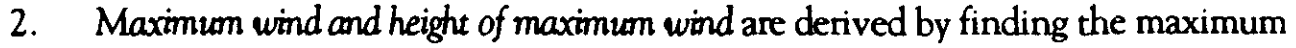

2. Maximum wind and height of maximum wind are derived by finding the maximum

Maximum wind and height of maximum wind are derived by finding the maximum

---

49 2 45


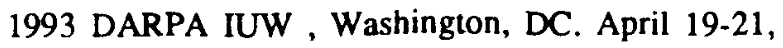

1993 DARPA IUW , Washington, DC. April 19-21,

1993 DARPA IUW, Washington, DC. April 19-21

---

53 5 5


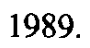

1989.

---

56 64 64


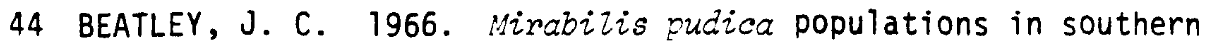

44 BEATLEY, J. C. 1966. Mirabilis pudica populations in southern

---

60 1 41


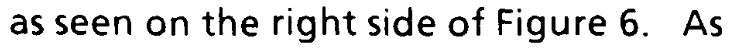

as seen on the right side of Figure 6. As

as seen on the right side of figure 6. As

---

70 3 50


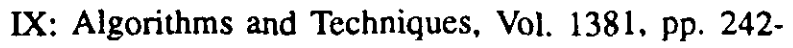

IX: Algorithms and Techniques, Vol. 1381, pp. 242-

IX: Algorithms and Techniques, Vol. 1381, pp. 242-242

---

87 3 48


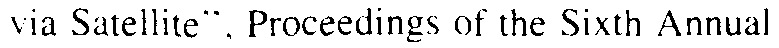

via Satellite'', Proceedings of the Sixth Annual

via Satellite - Proceedings of the Sixth Annual

---

109 1 36


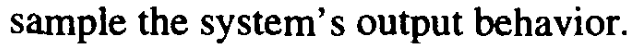

sample the system's output behavior.

Sample the system's output behavior.

---

116 1 60


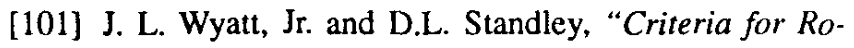

[101] J. L. Wyatt, Jr. and D.L. Standley, ''Criteria for Ro-

[10] J. L. Wyatt, Jr. and D.L. Standley, “Criteria for Ro-

---

121 1 50


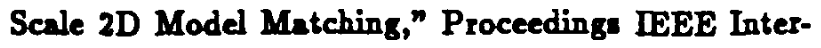

Scale 2D Model Matching,'' Proceedings IEEE Inter-

Scale 2D Model Matching," Proceedings IEEE Inte-

---

126 1 63


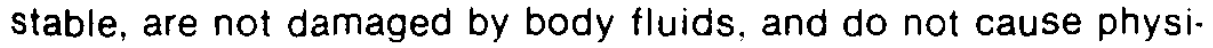

stable, are not damaged by body fluids, and do not cause physi-

stable, are not damaged by body fluids, and do not cause physi

---

135 6 52


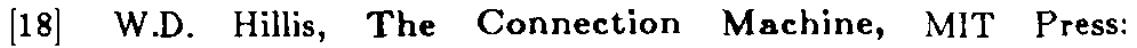

[18] W.D. Hillis, The Connection Machine, MIT Press:

W.D. Hillis, The Connection Machine, MIT Press

---

141 12 128


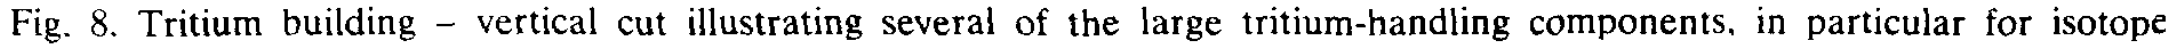

Fig. 8. Tritium building - vertical cut illustrating several of the large tritium-handling components, in particular for isotope

Fig. 8. Tritium building – vertical cut illustrating several of the large tritium-handling components, in particular for isotope separation.

---

149 8 45


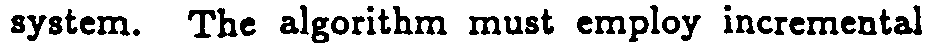

system. The algorithm must employ incremental

The algorithm must employ incremental

---

166 3 3


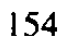

154

---

171 1 54


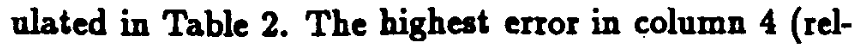

ulated in Table 2. The highest error in column 4 (rel-

ulated in Table 2. The highest error in column 4 (re-

---

178 1 83


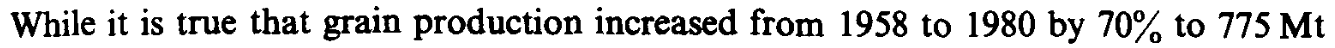

While it is true that grain production increased from 1958 to 1980 by 70% to 775 Mt

While it is true that grain production increased from 1958 to 1980 by 70% to 775 Mt.

---

182 2 59


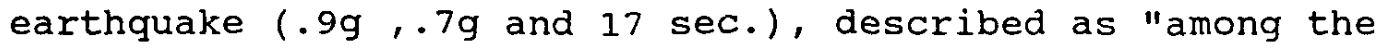

earthquake (.9g ,.7g and 17 sec.), described as ''among the

earthquake (.9g, .7g and 17 sec.), described as "among the

---

185 1 69


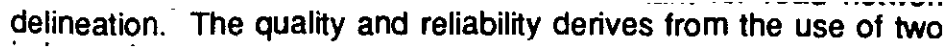

delineation. The quality and reliability derives from the use of two,

delineation. The quality and reliability derives from the use of two

---

199 1 40


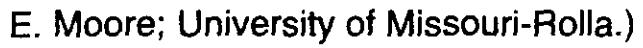

E. Moore; University of Missouri-Rolla.)

E. Moore; University of Missouri-Rolla.

In [33]:
dataset = wds.WebDataset("./uw3-test.tar").decode("pil")
ocrerrs = utils.OCRErrors()
for i, sample in enumerate(islice(dataset, 200)):
    image = sample["png"]
    image = ImageOps.invert(image)
    gt = sample["txt"]
    pred = gpt_recognize_text(image)
    errs = ocrerrs.add(pred, gt)[0]
    if errs > 0:
        display(Markdown("---"))
        print(i, errs, len(gt))
        display(image)
        display(Markdown(gt))
        display(Markdown(pred))


In [34]:
print(ocrerrs)

Normalized: 230/9277 (0.0248)
Text only: 164/8975 (0.0183)
